In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 1000
training_epochs = 5000
nb_classes = 4
drop_rate = 0.3

In [2]:
xy = np.loadtxt('MIMO_2_0dB.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 1:13]
y_data = xy[:, -4:]

print(x_data.shape, y_data.shape)
print(x_data)

(400000, 12) (400000, 4)
[[ 3.985979    2.9266756  -1.4389254  ... -0.9246753  -0.30659586
   0.24227208]
 [-0.16229424 -2.2363117   0.46064845 ...  1.0533752   0.99633783
   1.0021063 ]
 [-1.4659348   1.0638415  -1.7712959  ... -0.556693    0.6281906
  -0.8111011 ]
 ...
 [-0.6823769   1.5280095  -0.04487954 ...  0.4623038  -0.16403863
   0.66769725]
 [ 0.9017219   0.17446594 -0.03713961 ... -0.63819283 -0.5459519
   0.48846105]
 [-0.7833187  -1.8923963   1.1181778  ... -0.30434546  0.33093032
  -1.3220665 ]]


In [3]:
# Convert y_data to y_bit
i=1
y_merge = []
while i <= y_data.shape[0]:
    temp = "".join(str(_) for _ in y_data[i-1,:])
    y_merge.append(temp)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_merge)
y_bit = encoder.transform(y_merge)
y_bit = y_bit.reshape(-1, 1)
print(y_bit)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]


In [4]:
# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_bit, nb_classes)
print("one_hot:", y_one_hot)

one_hot: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [5]:
tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

In [6]:
tf.model.add(tf.keras.layers.Dense(input_dim=x_data.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.001), units=384, activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=384, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=192, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['binary_accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               4992      
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 384)               147840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               73920     
_________________________________________________________________
dropout_2 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 7

In [7]:
history = tf.model.fit(x_data, y_one_hot, batch_size=batch_size , validation_split=0.2, epochs=training_epochs)

Epoch 1/5000
320/320 [==============================] - 2s 4ms/step - loss: 0.4441 - binary_accuracy: 0.8713 - val_loss: 0.6130 - val_binary_accuracy: 0.7067
Epoch 2/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2849 - binary_accuracy: 0.8986 - val_loss: 0.5942 - val_binary_accuracy: 0.7253
Epoch 3/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2756 - binary_accuracy: 0.9003 - val_loss: 0.5485 - val_binary_accuracy: 0.7496
Epoch 4/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2720 - binary_accuracy: 0.9001 - val_loss: 0.5393 - val_binary_accuracy: 0.7516
Epoch 5/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2683 - binary_accuracy: 0.9006 - val_loss: 0.5479 - val_binary_accuracy: 0.7529
Epoch 6/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2663 - binary_accuracy: 0.9005 - val_loss: 0.5323 - val_binary_accuracy: 0.7579
Epoch 7/5000
320/320 [==============================

320/320 [==============================] - 1s 4ms/step - loss: 0.2468 - binary_accuracy: 0.9016 - val_loss: 0.5843 - val_binary_accuracy: 0.7392
Epoch 53/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2473 - binary_accuracy: 0.9014 - val_loss: 0.5073 - val_binary_accuracy: 0.7787
Epoch 54/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2476 - binary_accuracy: 0.9014 - val_loss: 0.5000 - val_binary_accuracy: 0.7768
Epoch 55/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2470 - binary_accuracy: 0.9017 - val_loss: 0.5113 - val_binary_accuracy: 0.7728
Epoch 56/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2468 - binary_accuracy: 0.9018 - val_loss: 0.5574 - val_binary_accuracy: 0.7511
Epoch 57/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2472 - binary_accuracy: 0.9015 - val_loss: 0.6643 - val_binary_accuracy: 0.7084
Epoch 58/5000
320/320 [==============================] - 1s 

320/320 [==============================] - 1s 4ms/step - loss: 0.2444 - binary_accuracy: 0.9019 - val_loss: 0.5539 - val_binary_accuracy: 0.7634
Epoch 104/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2440 - binary_accuracy: 0.9020 - val_loss: 0.5497 - val_binary_accuracy: 0.7560
Epoch 105/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2441 - binary_accuracy: 0.9021 - val_loss: 0.5658 - val_binary_accuracy: 0.7469
Epoch 106/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2446 - binary_accuracy: 0.9018 - val_loss: 0.5421 - val_binary_accuracy: 0.7551
Epoch 107/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2444 - binary_accuracy: 0.9019 - val_loss: 0.5969 - val_binary_accuracy: 0.7294
Epoch 108/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2446 - binary_accuracy: 0.9021 - val_loss: 0.4709 - val_binary_accuracy: 0.7919
Epoch 109/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2437 - binary_accuracy: 0.9019 - val_loss: 0.5434 - val_binary_accuracy: 0.7528
Epoch 155/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2437 - binary_accuracy: 0.9019 - val_loss: 0.5456 - val_binary_accuracy: 0.7625
Epoch 156/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2436 - binary_accuracy: 0.9020 - val_loss: 0.5362 - val_binary_accuracy: 0.7614
Epoch 157/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2433 - binary_accuracy: 0.9021 - val_loss: 0.6037 - val_binary_accuracy: 0.7341
Epoch 158/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2433 - binary_accuracy: 0.9022 - val_loss: 0.5106 - val_binary_accuracy: 0.7701
Epoch 159/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2436 - binary_accuracy: 0.9016 - val_loss: 0.4769 - val_binary_accuracy: 0.7839
Epoch 160/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9018 - val_loss: 0.4923 - val_binary_accuracy: 0.7856
Epoch 206/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2433 - binary_accuracy: 0.9018 - val_loss: 0.4873 - val_binary_accuracy: 0.7811
Epoch 207/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2436 - binary_accuracy: 0.9018 - val_loss: 0.4814 - val_binary_accuracy: 0.7808
Epoch 208/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2436 - binary_accuracy: 0.9017 - val_loss: 0.5393 - val_binary_accuracy: 0.7658
Epoch 209/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2431 - binary_accuracy: 0.9018 - val_loss: 0.5275 - val_binary_accuracy: 0.7664
Epoch 210/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2435 - binary_accuracy: 0.9018 - val_loss: 0.5296 - val_binary_accuracy: 0.7589
Epoch 211/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2433 - binary_accuracy: 0.9017 - val_loss: 0.5647 - val_binary_accuracy: 0.7520
Epoch 257/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9020 - val_loss: 0.5575 - val_binary_accuracy: 0.7539
Epoch 258/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9020 - val_loss: 0.5221 - val_binary_accuracy: 0.7677
Epoch 259/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2434 - binary_accuracy: 0.9012 - val_loss: 0.5350 - val_binary_accuracy: 0.7621
Epoch 260/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2433 - binary_accuracy: 0.9019 - val_loss: 0.5335 - val_binary_accuracy: 0.7623
Epoch 261/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9017 - val_loss: 0.5247 - val_binary_accuracy: 0.7625
Epoch 262/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2432 - binary_accuracy: 0.9016 - val_loss: 0.5305 - val_binary_accuracy: 0.7625
Epoch 308/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9017 - val_loss: 0.5514 - val_binary_accuracy: 0.7522
Epoch 309/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9022 - val_loss: 0.5689 - val_binary_accuracy: 0.7491
Epoch 310/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9018 - val_loss: 0.4898 - val_binary_accuracy: 0.7834
Epoch 311/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9018 - val_loss: 0.5131 - val_binary_accuracy: 0.7685
Epoch 312/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9019 - val_loss: 0.5399 - val_binary_accuracy: 0.7590
Epoch 313/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2434 - binary_accuracy: 0.9015 - val_loss: 0.5962 - val_binary_accuracy: 0.7325
Epoch 359/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9019 - val_loss: 0.5271 - val_binary_accuracy: 0.7590
Epoch 360/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9016 - val_loss: 0.5133 - val_binary_accuracy: 0.7746
Epoch 361/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9018 - val_loss: 0.4578 - val_binary_accuracy: 0.7846
Epoch 362/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.6027 - val_binary_accuracy: 0.7448
Epoch 363/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.5258 - val_binary_accuracy: 0.7667
Epoch 364/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5439 - val_binary_accuracy: 0.7574
Epoch 410/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9019 - val_loss: 0.5499 - val_binary_accuracy: 0.7563
Epoch 411/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9020 - val_loss: 0.5305 - val_binary_accuracy: 0.7618
Epoch 412/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2431 - binary_accuracy: 0.9018 - val_loss: 0.4823 - val_binary_accuracy: 0.7851
Epoch 413/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5425 - val_binary_accuracy: 0.7645
Epoch 414/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.4684 - val_binary_accuracy: 0.7932
Epoch 415/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9017 - val_loss: 0.4934 - val_binary_accuracy: 0.7842
Epoch 461/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.5487 - val_binary_accuracy: 0.7626
Epoch 462/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5391 - val_binary_accuracy: 0.7627
Epoch 463/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.4657 - val_binary_accuracy: 0.7939
Epoch 464/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2432 - binary_accuracy: 0.9016 - val_loss: 0.5009 - val_binary_accuracy: 0.7772
Epoch 465/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9019 - val_loss: 0.4966 - val_binary_accuracy: 0.7863
Epoch 466/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5156 - val_binary_accuracy: 0.7675
Epoch 512/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9018 - val_loss: 0.4936 - val_binary_accuracy: 0.7794
Epoch 513/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.5176 - val_binary_accuracy: 0.7701
Epoch 514/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.6034 - val_binary_accuracy: 0.7293
Epoch 515/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5699 - val_binary_accuracy: 0.7584
Epoch 516/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2434 - binary_accuracy: 0.9013 - val_loss: 0.5050 - val_binary_accuracy: 0.7691
Epoch 517/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9018 - val_loss: 0.5109 - val_binary_accuracy: 0.7774
Epoch 563/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9017 - val_loss: 0.4892 - val_binary_accuracy: 0.7827
Epoch 564/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.5365 - val_binary_accuracy: 0.7574
Epoch 565/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9016 - val_loss: 0.4777 - val_binary_accuracy: 0.7843
Epoch 566/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9017 - val_loss: 0.5101 - val_binary_accuracy: 0.7658
Epoch 567/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9017 - val_loss: 0.5143 - val_binary_accuracy: 0.7695
Epoch 568/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.5138 - val_binary_accuracy: 0.7785
Epoch 614/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9015 - val_loss: 0.5147 - val_binary_accuracy: 0.7687
Epoch 615/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9022 - val_loss: 0.4959 - val_binary_accuracy: 0.7813
Epoch 616/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9014 - val_loss: 0.5442 - val_binary_accuracy: 0.7570
Epoch 617/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9020 - val_loss: 0.5248 - val_binary_accuracy: 0.7685
Epoch 618/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9018 - val_loss: 0.5216 - val_binary_accuracy: 0.7751
Epoch 619/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9019 - val_loss: 0.4920 - val_binary_accuracy: 0.7828
Epoch 665/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5214 - val_binary_accuracy: 0.7651
Epoch 666/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9019 - val_loss: 0.5201 - val_binary_accuracy: 0.7709
Epoch 667/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.5977 - val_binary_accuracy: 0.7415
Epoch 668/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9016 - val_loss: 0.5487 - val_binary_accuracy: 0.7598
Epoch 669/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9018 - val_loss: 0.5765 - val_binary_accuracy: 0.7447
Epoch 670/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9019 - val_loss: 0.4980 - val_binary_accuracy: 0.7698
Epoch 716/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9022 - val_loss: 0.5337 - val_binary_accuracy: 0.7698
Epoch 717/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9019 - val_loss: 0.5351 - val_binary_accuracy: 0.7605
Epoch 718/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9020 - val_loss: 0.5884 - val_binary_accuracy: 0.7470
Epoch 719/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.4885 - val_binary_accuracy: 0.7834
Epoch 720/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.6073 - val_binary_accuracy: 0.7344
Epoch 721/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9019 - val_loss: 0.4714 - val_binary_accuracy: 0.7882
Epoch 767/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9019 - val_loss: 0.5054 - val_binary_accuracy: 0.7680
Epoch 768/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9019 - val_loss: 0.4731 - val_binary_accuracy: 0.7915
Epoch 769/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9016 - val_loss: 0.5578 - val_binary_accuracy: 0.7507
Epoch 770/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9018 - val_loss: 0.5331 - val_binary_accuracy: 0.7642
Epoch 771/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.4811 - val_binary_accuracy: 0.7801
Epoch 772/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9015 - val_loss: 0.5568 - val_binary_accuracy: 0.7507
Epoch 818/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.6130 - val_binary_accuracy: 0.7426
Epoch 819/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.5787 - val_binary_accuracy: 0.7387
Epoch 820/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.4577 - val_binary_accuracy: 0.7988
Epoch 821/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9019 - val_loss: 0.5163 - val_binary_accuracy: 0.7743
Epoch 822/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9020 - val_loss: 0.4878 - val_binary_accuracy: 0.7828
Epoch 823/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9017 - val_loss: 0.5117 - val_binary_accuracy: 0.7657
Epoch 869/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9017 - val_loss: 0.5493 - val_binary_accuracy: 0.7622
Epoch 870/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9019 - val_loss: 0.5248 - val_binary_accuracy: 0.7747
Epoch 871/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5369 - val_binary_accuracy: 0.7672
Epoch 872/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5225 - val_binary_accuracy: 0.7677
Epoch 873/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.4924 - val_binary_accuracy: 0.7831
Epoch 874/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9015 - val_loss: 0.6209 - val_binary_accuracy: 0.7300
Epoch 920/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5018 - val_binary_accuracy: 0.7807
Epoch 921/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9017 - val_loss: 0.5327 - val_binary_accuracy: 0.7660
Epoch 922/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9014 - val_loss: 0.5397 - val_binary_accuracy: 0.7592
Epoch 923/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9018 - val_loss: 0.5399 - val_binary_accuracy: 0.7575
Epoch 924/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.5236 - val_binary_accuracy: 0.7636
Epoch 925/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9020 - val_loss: 0.5183 - val_binary_accuracy: 0.7596
Epoch 971/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5195 - val_binary_accuracy: 0.7767
Epoch 972/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.5409 - val_binary_accuracy: 0.7607
Epoch 973/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9017 - val_loss: 0.4359 - val_binary_accuracy: 0.8062
Epoch 974/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.4873 - val_binary_accuracy: 0.7829
Epoch 975/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9017 - val_loss: 0.5201 - val_binary_accuracy: 0.7747
Epoch 976/5000
320/320 [==============================]

320/320 [==============================] - 1s 4ms/step - loss: 0.2418 - binary_accuracy: 0.9020 - val_loss: 0.5252 - val_binary_accuracy: 0.7713
Epoch 1022/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9017 - val_loss: 0.5418 - val_binary_accuracy: 0.7579
Epoch 1023/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9017 - val_loss: 0.5372 - val_binary_accuracy: 0.7690
Epoch 1024/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9015 - val_loss: 0.5263 - val_binary_accuracy: 0.7707
Epoch 1025/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9015 - val_loss: 0.4846 - val_binary_accuracy: 0.7887
Epoch 1026/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9015 - val_loss: 0.5344 - val_binary_accuracy: 0.7509
Epoch 1027/5000
320/320 [=========================

Epoch 1072/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5130 - val_binary_accuracy: 0.7714
Epoch 1073/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9019 - val_loss: 0.4808 - val_binary_accuracy: 0.7852
Epoch 1074/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.5091 - val_binary_accuracy: 0.7775
Epoch 1075/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9019 - val_loss: 0.5639 - val_binary_accuracy: 0.7416
Epoch 1076/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9015 - val_loss: 0.4892 - val_binary_accuracy: 0.7797
Epoch 1077/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9018 - val_loss: 0.5181 - val_binary_accuracy: 0.7743
Epoch 1078/5000
320/320 [=========

320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.6072 - val_binary_accuracy: 0.7408
Epoch 1123/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9022 - val_loss: 0.5175 - val_binary_accuracy: 0.7717
Epoch 1124/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5423 - val_binary_accuracy: 0.7619
Epoch 1125/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.5843 - val_binary_accuracy: 0.7426
Epoch 1126/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2418 - binary_accuracy: 0.9022 - val_loss: 0.5430 - val_binary_accuracy: 0.7629
Epoch 1127/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2433 - binary_accuracy: 0.9014 - val_loss: 0.5404 - val_binary_accuracy: 0.7621
Epoch 1128/5000
320/320 [=========================

Epoch 1173/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.5360 - val_binary_accuracy: 0.7696
Epoch 1174/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9016 - val_loss: 0.5239 - val_binary_accuracy: 0.7605
Epoch 1175/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9016 - val_loss: 0.5371 - val_binary_accuracy: 0.7619
Epoch 1176/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9017 - val_loss: 0.4957 - val_binary_accuracy: 0.7824
Epoch 1177/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9017 - val_loss: 0.5611 - val_binary_accuracy: 0.7561
Epoch 1178/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9017 - val_loss: 0.5319 - val_binary_accuracy: 0.7618
Epoch 1179/5000
320/320 [=========

Epoch 1224/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9018 - val_loss: 0.5633 - val_binary_accuracy: 0.7494
Epoch 1225/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.5163 - val_binary_accuracy: 0.7725
Epoch 1226/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9016 - val_loss: 0.5359 - val_binary_accuracy: 0.7598
Epoch 1227/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9020 - val_loss: 0.5486 - val_binary_accuracy: 0.7545
Epoch 1228/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.4984 - val_binary_accuracy: 0.7688
Epoch 1229/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9015 - val_loss: 0.5720 - val_binary_accuracy: 0.7444
Epoch 1230/5000
320/320 [=========

Epoch 1275/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2419 - binary_accuracy: 0.9019 - val_loss: 0.5506 - val_binary_accuracy: 0.7552
Epoch 1276/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2417 - binary_accuracy: 0.9021 - val_loss: 0.6073 - val_binary_accuracy: 0.7301
Epoch 1277/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9014 - val_loss: 0.5496 - val_binary_accuracy: 0.7544
Epoch 1278/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.5161 - val_binary_accuracy: 0.7663
Epoch 1279/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5344 - val_binary_accuracy: 0.7613
Epoch 1280/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9019 - val_loss: 0.5615 - val_binary_accuracy: 0.7582
Epoch 1281/5000
320/320 [=========

Epoch 1326/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9021 - val_loss: 0.5625 - val_binary_accuracy: 0.7536
Epoch 1327/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9016 - val_loss: 0.5189 - val_binary_accuracy: 0.7686
Epoch 1328/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9014 - val_loss: 0.5424 - val_binary_accuracy: 0.7560
Epoch 1329/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.5192 - val_binary_accuracy: 0.7747
Epoch 1330/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9012 - val_loss: 0.5050 - val_binary_accuracy: 0.7716
Epoch 1331/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5045 - val_binary_accuracy: 0.7839
Epoch 1332/5000
320/320 [=========

Epoch 1377/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9020 - val_loss: 0.5235 - val_binary_accuracy: 0.7653
Epoch 1378/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2418 - binary_accuracy: 0.9019 - val_loss: 0.5232 - val_binary_accuracy: 0.7712
Epoch 1379/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.5345 - val_binary_accuracy: 0.7654
Epoch 1380/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5739 - val_binary_accuracy: 0.7445
Epoch 1381/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9014 - val_loss: 0.4963 - val_binary_accuracy: 0.7829
Epoch 1382/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9017 - val_loss: 0.5848 - val_binary_accuracy: 0.7478
Epoch 1383/5000
320/320 [=========

Epoch 1428/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9021 - val_loss: 0.5187 - val_binary_accuracy: 0.7689
Epoch 1429/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9019 - val_loss: 0.5426 - val_binary_accuracy: 0.7615
Epoch 1430/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9019 - val_loss: 0.5264 - val_binary_accuracy: 0.7659
Epoch 1431/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9017 - val_loss: 0.4653 - val_binary_accuracy: 0.7914
Epoch 1432/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9018 - val_loss: 0.5661 - val_binary_accuracy: 0.7549
Epoch 1433/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.4986 - val_binary_accuracy: 0.7808
Epoch 1434/5000
320/320 [=========

Epoch 1479/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9021 - val_loss: 0.4954 - val_binary_accuracy: 0.7794
Epoch 1480/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5651 - val_binary_accuracy: 0.7491
Epoch 1481/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9017 - val_loss: 0.6135 - val_binary_accuracy: 0.7330
Epoch 1482/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.4892 - val_binary_accuracy: 0.7869
Epoch 1483/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9017 - val_loss: 0.5341 - val_binary_accuracy: 0.7606
Epoch 1484/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9019 - val_loss: 0.5616 - val_binary_accuracy: 0.7469
Epoch 1485/5000
320/320 [=========

Epoch 1530/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9018 - val_loss: 0.5935 - val_binary_accuracy: 0.7511
Epoch 1531/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9014 - val_loss: 0.5066 - val_binary_accuracy: 0.7692
Epoch 1532/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5929 - val_binary_accuracy: 0.7368
Epoch 1533/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9015 - val_loss: 0.4943 - val_binary_accuracy: 0.7822
Epoch 1534/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9018 - val_loss: 0.5220 - val_binary_accuracy: 0.7749
Epoch 1535/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2417 - binary_accuracy: 0.9019 - val_loss: 0.4912 - val_binary_accuracy: 0.7759
Epoch 1536/5000
320/320 [=========

Epoch 1581/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9018 - val_loss: 0.5243 - val_binary_accuracy: 0.7663
Epoch 1582/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9015 - val_loss: 0.5187 - val_binary_accuracy: 0.7648
Epoch 1583/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5324 - val_binary_accuracy: 0.7647
Epoch 1584/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9020 - val_loss: 0.4706 - val_binary_accuracy: 0.7889
Epoch 1585/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.5672 - val_binary_accuracy: 0.7454
Epoch 1586/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5059 - val_binary_accuracy: 0.7751
Epoch 1587/5000
320/320 [=========

Epoch 1632/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9015 - val_loss: 0.5323 - val_binary_accuracy: 0.7662
Epoch 1633/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9020 - val_loss: 0.5010 - val_binary_accuracy: 0.7808
Epoch 1634/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9017 - val_loss: 0.5551 - val_binary_accuracy: 0.7586
Epoch 1635/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9018 - val_loss: 0.5628 - val_binary_accuracy: 0.7494
Epoch 1636/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2419 - binary_accuracy: 0.9019 - val_loss: 0.5460 - val_binary_accuracy: 0.7615
Epoch 1637/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9014 - val_loss: 0.5174 - val_binary_accuracy: 0.7663
Epoch 1638/5000
320/320 [=========

Epoch 1683/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9017 - val_loss: 0.5271 - val_binary_accuracy: 0.7696
Epoch 1684/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9016 - val_loss: 0.5100 - val_binary_accuracy: 0.7843
Epoch 1685/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9018 - val_loss: 0.4775 - val_binary_accuracy: 0.7853
Epoch 1686/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2431 - binary_accuracy: 0.9015 - val_loss: 0.4933 - val_binary_accuracy: 0.7855
Epoch 1687/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9020 - val_loss: 0.5160 - val_binary_accuracy: 0.7664
Epoch 1688/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.5907 - val_binary_accuracy: 0.7476
Epoch 1689/5000
320/320 [=========

Epoch 1734/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5183 - val_binary_accuracy: 0.7782
Epoch 1735/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9018 - val_loss: 0.5366 - val_binary_accuracy: 0.7586
Epoch 1736/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9015 - val_loss: 0.5367 - val_binary_accuracy: 0.7736
Epoch 1737/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5370 - val_binary_accuracy: 0.7620
Epoch 1738/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9017 - val_loss: 0.5315 - val_binary_accuracy: 0.7627
Epoch 1739/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9019 - val_loss: 0.5277 - val_binary_accuracy: 0.7654
Epoch 1740/5000
320/320 [=========

Epoch 1785/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.6019 - val_binary_accuracy: 0.7363
Epoch 1786/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9017 - val_loss: 0.5487 - val_binary_accuracy: 0.7514
Epoch 1787/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9016 - val_loss: 0.5681 - val_binary_accuracy: 0.7522
Epoch 1788/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.5133 - val_binary_accuracy: 0.7715
Epoch 1789/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9015 - val_loss: 0.5685 - val_binary_accuracy: 0.7441
Epoch 1790/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.4853 - val_binary_accuracy: 0.7875
Epoch 1791/5000
320/320 [=========

Epoch 1836/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.5003 - val_binary_accuracy: 0.7812
Epoch 1837/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5099 - val_binary_accuracy: 0.7676
Epoch 1838/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9016 - val_loss: 0.5124 - val_binary_accuracy: 0.7671
Epoch 1839/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9018 - val_loss: 0.5834 - val_binary_accuracy: 0.7408
Epoch 1840/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9016 - val_loss: 0.4994 - val_binary_accuracy: 0.7752
Epoch 1841/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5173 - val_binary_accuracy: 0.7791
Epoch 1842/5000
320/320 [=========

Epoch 1887/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5180 - val_binary_accuracy: 0.7690
Epoch 1888/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9020 - val_loss: 0.5329 - val_binary_accuracy: 0.7719
Epoch 1889/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9014 - val_loss: 0.4484 - val_binary_accuracy: 0.7931
Epoch 1890/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5161 - val_binary_accuracy: 0.7745
Epoch 1891/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9019 - val_loss: 0.5171 - val_binary_accuracy: 0.7620
Epoch 1892/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9019 - val_loss: 0.5058 - val_binary_accuracy: 0.7776
Epoch 1893/5000
320/320 [=========

Epoch 1938/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9015 - val_loss: 0.5708 - val_binary_accuracy: 0.7490
Epoch 1939/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.5009 - val_binary_accuracy: 0.7815
Epoch 1940/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9016 - val_loss: 0.5176 - val_binary_accuracy: 0.7702
Epoch 1941/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9020 - val_loss: 0.4815 - val_binary_accuracy: 0.7828
Epoch 1942/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.4447 - val_binary_accuracy: 0.7968
Epoch 1943/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9019 - val_loss: 0.5682 - val_binary_accuracy: 0.7519
Epoch 1944/5000
320/320 [=========

Epoch 1989/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9015 - val_loss: 0.5766 - val_binary_accuracy: 0.7427
Epoch 1990/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9017 - val_loss: 0.5495 - val_binary_accuracy: 0.7604
Epoch 1991/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9018 - val_loss: 0.5783 - val_binary_accuracy: 0.7435
Epoch 1992/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.4872 - val_binary_accuracy: 0.7871
Epoch 1993/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.5590 - val_binary_accuracy: 0.7516
Epoch 1994/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.5496 - val_binary_accuracy: 0.7544
Epoch 1995/5000
320/320 [=========

Epoch 2040/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9020 - val_loss: 0.5168 - val_binary_accuracy: 0.7690
Epoch 2041/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9017 - val_loss: 0.5515 - val_binary_accuracy: 0.7625
Epoch 2042/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9015 - val_loss: 0.4699 - val_binary_accuracy: 0.7924
Epoch 2043/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9018 - val_loss: 0.4707 - val_binary_accuracy: 0.7929
Epoch 2044/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5465 - val_binary_accuracy: 0.7633
Epoch 2045/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5743 - val_binary_accuracy: 0.7533
Epoch 2046/5000
320/320 [=========

Epoch 2091/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5992 - val_binary_accuracy: 0.7372
Epoch 2092/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9020 - val_loss: 0.4916 - val_binary_accuracy: 0.7873
Epoch 2093/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9016 - val_loss: 0.5953 - val_binary_accuracy: 0.7395
Epoch 2094/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.5222 - val_binary_accuracy: 0.7699
Epoch 2095/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9016 - val_loss: 0.4743 - val_binary_accuracy: 0.7896
Epoch 2096/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.4785 - val_binary_accuracy: 0.7838
Epoch 2097/5000
320/320 [=========

Epoch 2142/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2419 - binary_accuracy: 0.9020 - val_loss: 0.4926 - val_binary_accuracy: 0.7764
Epoch 2143/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.4950 - val_binary_accuracy: 0.7862
Epoch 2144/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9016 - val_loss: 0.5338 - val_binary_accuracy: 0.7676
Epoch 2145/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9016 - val_loss: 0.4985 - val_binary_accuracy: 0.7782
Epoch 2146/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9020 - val_loss: 0.4796 - val_binary_accuracy: 0.7805
Epoch 2147/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9018 - val_loss: 0.5198 - val_binary_accuracy: 0.7622
Epoch 2148/5000
320/320 [=========

Epoch 2193/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5634 - val_binary_accuracy: 0.7493
Epoch 2194/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9019 - val_loss: 0.5310 - val_binary_accuracy: 0.7612
Epoch 2195/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.5472 - val_binary_accuracy: 0.7545
Epoch 2196/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2419 - binary_accuracy: 0.9021 - val_loss: 0.5581 - val_binary_accuracy: 0.7541
Epoch 2197/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9015 - val_loss: 0.5202 - val_binary_accuracy: 0.7670
Epoch 2198/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9019 - val_loss: 0.4989 - val_binary_accuracy: 0.7726
Epoch 2199/5000
320/320 [=========

Epoch 2244/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.5127 - val_binary_accuracy: 0.7778
Epoch 2245/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9014 - val_loss: 0.5411 - val_binary_accuracy: 0.7561
Epoch 2246/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9019 - val_loss: 0.5265 - val_binary_accuracy: 0.7686
Epoch 2247/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.4812 - val_binary_accuracy: 0.7812
Epoch 2248/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.4913 - val_binary_accuracy: 0.7803
Epoch 2249/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5719 - val_binary_accuracy: 0.7510
Epoch 2250/5000
320/320 [=========

Epoch 2295/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.5169 - val_binary_accuracy: 0.7665
Epoch 2296/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9017 - val_loss: 0.5178 - val_binary_accuracy: 0.7704
Epoch 2297/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9021 - val_loss: 0.5073 - val_binary_accuracy: 0.7709
Epoch 2298/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2431 - binary_accuracy: 0.9016 - val_loss: 0.5383 - val_binary_accuracy: 0.7616
Epoch 2299/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9016 - val_loss: 0.4602 - val_binary_accuracy: 0.7923
Epoch 2300/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5632 - val_binary_accuracy: 0.7487
Epoch 2301/5000
320/320 [=========

Epoch 2346/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9020 - val_loss: 0.5531 - val_binary_accuracy: 0.7600
Epoch 2347/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9014 - val_loss: 0.4726 - val_binary_accuracy: 0.7794
Epoch 2348/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.4914 - val_binary_accuracy: 0.7826
Epoch 2349/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9017 - val_loss: 0.5256 - val_binary_accuracy: 0.7683
Epoch 2350/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9019 - val_loss: 0.5205 - val_binary_accuracy: 0.7747
Epoch 2351/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9013 - val_loss: 0.5592 - val_binary_accuracy: 0.7520
Epoch 2352/5000
320/320 [=========

Epoch 2397/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5442 - val_binary_accuracy: 0.7672
Epoch 2398/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9013 - val_loss: 0.5611 - val_binary_accuracy: 0.7545
Epoch 2399/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.5127 - val_binary_accuracy: 0.7739
Epoch 2400/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.4866 - val_binary_accuracy: 0.7829
Epoch 2401/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5549 - val_binary_accuracy: 0.7626
Epoch 2402/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9020 - val_loss: 0.5759 - val_binary_accuracy: 0.7511
Epoch 2403/5000
320/320 [=========

Epoch 2448/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5379 - val_binary_accuracy: 0.7586
Epoch 2449/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5061 - val_binary_accuracy: 0.7705
Epoch 2450/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5401 - val_binary_accuracy: 0.7613
Epoch 2451/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9015 - val_loss: 0.5315 - val_binary_accuracy: 0.7605
Epoch 2452/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9019 - val_loss: 0.5769 - val_binary_accuracy: 0.7401
Epoch 2453/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9019 - val_loss: 0.5146 - val_binary_accuracy: 0.7719
Epoch 2454/5000
320/320 [=========

Epoch 2499/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9015 - val_loss: 0.4433 - val_binary_accuracy: 0.7978
Epoch 2500/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2418 - binary_accuracy: 0.9019 - val_loss: 0.5456 - val_binary_accuracy: 0.7576
Epoch 2501/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9018 - val_loss: 0.5362 - val_binary_accuracy: 0.7640
Epoch 2502/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9019 - val_loss: 0.4900 - val_binary_accuracy: 0.7833
Epoch 2503/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9020 - val_loss: 0.4328 - val_binary_accuracy: 0.8093
Epoch 2504/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.5132 - val_binary_accuracy: 0.7743
Epoch 2505/5000
320/320 [=========

Epoch 2550/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9016 - val_loss: 0.5134 - val_binary_accuracy: 0.7739
Epoch 2551/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9014 - val_loss: 0.5293 - val_binary_accuracy: 0.7652
Epoch 2552/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2418 - binary_accuracy: 0.9020 - val_loss: 0.6376 - val_binary_accuracy: 0.7135
Epoch 2553/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.4792 - val_binary_accuracy: 0.7889
Epoch 2554/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.5404 - val_binary_accuracy: 0.7608
Epoch 2555/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5155 - val_binary_accuracy: 0.7704
Epoch 2556/5000
320/320 [=========

Epoch 2601/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9016 - val_loss: 0.5284 - val_binary_accuracy: 0.7631
Epoch 2602/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5489 - val_binary_accuracy: 0.7545
Epoch 2603/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9012 - val_loss: 0.6413 - val_binary_accuracy: 0.7248
Epoch 2604/5000
320/320 [==============================] - 1s 3ms/step - loss: 0.2420 - binary_accuracy: 0.9019 - val_loss: 0.4995 - val_binary_accuracy: 0.7776
Epoch 2605/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2419 - binary_accuracy: 0.9018 - val_loss: 0.5410 - val_binary_accuracy: 0.7688
Epoch 2606/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.4503 - val_binary_accuracy: 0.8025
Epoch 2607/5000
320/320 [=========

Epoch 2652/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9018 - val_loss: 0.5029 - val_binary_accuracy: 0.7725
Epoch 2653/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9018 - val_loss: 0.5884 - val_binary_accuracy: 0.7529
Epoch 2654/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5512 - val_binary_accuracy: 0.7660
Epoch 2655/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9015 - val_loss: 0.4797 - val_binary_accuracy: 0.7854
Epoch 2656/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.5335 - val_binary_accuracy: 0.7668
Epoch 2657/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9015 - val_loss: 0.5325 - val_binary_accuracy: 0.7687
Epoch 2658/5000
320/320 [=========

Epoch 2703/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2418 - binary_accuracy: 0.9018 - val_loss: 0.5298 - val_binary_accuracy: 0.7662
Epoch 2704/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5042 - val_binary_accuracy: 0.7794
Epoch 2705/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9020 - val_loss: 0.6052 - val_binary_accuracy: 0.7301
Epoch 2706/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9017 - val_loss: 0.4783 - val_binary_accuracy: 0.7890
Epoch 2707/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.5409 - val_binary_accuracy: 0.7618
Epoch 2708/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9019 - val_loss: 0.5017 - val_binary_accuracy: 0.7742
Epoch 2709/5000
320/320 [=========

Epoch 2754/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9019 - val_loss: 0.5311 - val_binary_accuracy: 0.7691
Epoch 2755/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2418 - binary_accuracy: 0.9022 - val_loss: 0.5122 - val_binary_accuracy: 0.7717
Epoch 2756/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9021 - val_loss: 0.5252 - val_binary_accuracy: 0.7685
Epoch 2757/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5486 - val_binary_accuracy: 0.7545
Epoch 2758/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9016 - val_loss: 0.5108 - val_binary_accuracy: 0.7800
Epoch 2759/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9015 - val_loss: 0.5391 - val_binary_accuracy: 0.7588
Epoch 2760/5000
320/320 [=========

Epoch 2805/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.4951 - val_binary_accuracy: 0.7733
Epoch 2806/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5077 - val_binary_accuracy: 0.7756
Epoch 2807/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5149 - val_binary_accuracy: 0.7687
Epoch 2808/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.4957 - val_binary_accuracy: 0.7938
Epoch 2809/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.4986 - val_binary_accuracy: 0.7786
Epoch 2810/5000
320/320 [==============================] - 1s 3ms/step - loss: 0.2423 - binary_accuracy: 0.9020 - val_loss: 0.5666 - val_binary_accuracy: 0.7490
Epoch 2811/5000
320/320 [=========

Epoch 2856/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9016 - val_loss: 0.4822 - val_binary_accuracy: 0.7824
Epoch 2857/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9015 - val_loss: 0.5623 - val_binary_accuracy: 0.7514
Epoch 2858/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9019 - val_loss: 0.5842 - val_binary_accuracy: 0.7311
Epoch 2859/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5321 - val_binary_accuracy: 0.7512
Epoch 2860/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9016 - val_loss: 0.6018 - val_binary_accuracy: 0.7482
Epoch 2861/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5098 - val_binary_accuracy: 0.7839
Epoch 2862/5000
320/320 [=========

320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9016 - val_loss: 0.4988 - val_binary_accuracy: 0.7761
Epoch 2907/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9017 - val_loss: 0.5762 - val_binary_accuracy: 0.7469
Epoch 2908/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.4455 - val_binary_accuracy: 0.7990
Epoch 2909/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9013 - val_loss: 0.5022 - val_binary_accuracy: 0.7771
Epoch 2910/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9014 - val_loss: 0.4509 - val_binary_accuracy: 0.7982
Epoch 2911/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.4985 - val_binary_accuracy: 0.7793
Epoch 2912/5000
320/320 [=========================

Epoch 2957/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9018 - val_loss: 0.5120 - val_binary_accuracy: 0.7747
Epoch 2958/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5029 - val_binary_accuracy: 0.7777
Epoch 2959/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9019 - val_loss: 0.5519 - val_binary_accuracy: 0.7566
Epoch 2960/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9015 - val_loss: 0.6172 - val_binary_accuracy: 0.7425
Epoch 2961/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2419 - binary_accuracy: 0.9017 - val_loss: 0.5272 - val_binary_accuracy: 0.7687
Epoch 2962/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9014 - val_loss: 0.4887 - val_binary_accuracy: 0.7781
Epoch 2963/5000
320/320 [=========

Epoch 3008/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.6131 - val_binary_accuracy: 0.7367
Epoch 3009/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9018 - val_loss: 0.5626 - val_binary_accuracy: 0.7457
Epoch 3010/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9020 - val_loss: 0.5483 - val_binary_accuracy: 0.7653
Epoch 3011/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9015 - val_loss: 0.4952 - val_binary_accuracy: 0.7807
Epoch 3012/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5108 - val_binary_accuracy: 0.7747
Epoch 3013/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5360 - val_binary_accuracy: 0.7560
Epoch 3014/5000
320/320 [=========

Epoch 3059/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9021 - val_loss: 0.5178 - val_binary_accuracy: 0.7712
Epoch 3060/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.5617 - val_binary_accuracy: 0.7539
Epoch 3061/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9015 - val_loss: 0.5819 - val_binary_accuracy: 0.7548
Epoch 3062/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9018 - val_loss: 0.5205 - val_binary_accuracy: 0.7724
Epoch 3063/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2416 - binary_accuracy: 0.9019 - val_loss: 0.5116 - val_binary_accuracy: 0.7746
Epoch 3064/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9018 - val_loss: 0.5722 - val_binary_accuracy: 0.7513
Epoch 3065/5000
320/320 [=========

Epoch 3110/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.4947 - val_binary_accuracy: 0.7838
Epoch 3111/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9015 - val_loss: 0.5498 - val_binary_accuracy: 0.7615
Epoch 3112/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9015 - val_loss: 0.5817 - val_binary_accuracy: 0.7437
Epoch 3113/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5188 - val_binary_accuracy: 0.7709
Epoch 3114/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9014 - val_loss: 0.4711 - val_binary_accuracy: 0.7832
Epoch 3115/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.4692 - val_binary_accuracy: 0.7890
Epoch 3116/5000
320/320 [=========

Epoch 3161/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9020 - val_loss: 0.5034 - val_binary_accuracy: 0.7714
Epoch 3162/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.4904 - val_binary_accuracy: 0.7891
Epoch 3163/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9015 - val_loss: 0.5992 - val_binary_accuracy: 0.7411
Epoch 3164/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9020 - val_loss: 0.5253 - val_binary_accuracy: 0.7661
Epoch 3165/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9015 - val_loss: 0.5207 - val_binary_accuracy: 0.7663
Epoch 3166/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9015 - val_loss: 0.5223 - val_binary_accuracy: 0.7665
Epoch 3167/5000
320/320 [=========

Epoch 3212/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9016 - val_loss: 0.5287 - val_binary_accuracy: 0.7625
Epoch 3213/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5435 - val_binary_accuracy: 0.7513
Epoch 3214/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9014 - val_loss: 0.5767 - val_binary_accuracy: 0.7525
Epoch 3215/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5508 - val_binary_accuracy: 0.7601
Epoch 3216/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.5585 - val_binary_accuracy: 0.7533
Epoch 3217/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9015 - val_loss: 0.5169 - val_binary_accuracy: 0.7700
Epoch 3218/5000
320/320 [=========

Epoch 3263/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5128 - val_binary_accuracy: 0.7754
Epoch 3264/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9014 - val_loss: 0.4879 - val_binary_accuracy: 0.7819
Epoch 3265/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.4678 - val_binary_accuracy: 0.7910
Epoch 3266/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9017 - val_loss: 0.5864 - val_binary_accuracy: 0.7445
Epoch 3267/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.4731 - val_binary_accuracy: 0.7936
Epoch 3268/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2419 - binary_accuracy: 0.9019 - val_loss: 0.4970 - val_binary_accuracy: 0.7775
Epoch 3269/5000
320/320 [=========

Epoch 3314/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9017 - val_loss: 0.5209 - val_binary_accuracy: 0.7736
Epoch 3315/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5719 - val_binary_accuracy: 0.7509
Epoch 3316/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9021 - val_loss: 0.5266 - val_binary_accuracy: 0.7620
Epoch 3317/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9015 - val_loss: 0.5276 - val_binary_accuracy: 0.7653
Epoch 3318/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9018 - val_loss: 0.5316 - val_binary_accuracy: 0.7646
Epoch 3319/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.5164 - val_binary_accuracy: 0.7737
Epoch 3320/5000
320/320 [=========

Epoch 3365/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.4752 - val_binary_accuracy: 0.7894
Epoch 3366/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9013 - val_loss: 0.4717 - val_binary_accuracy: 0.7931
Epoch 3367/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9019 - val_loss: 0.5329 - val_binary_accuracy: 0.7625
Epoch 3368/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9018 - val_loss: 0.4973 - val_binary_accuracy: 0.7774
Epoch 3369/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9016 - val_loss: 0.4852 - val_binary_accuracy: 0.7830
Epoch 3370/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9019 - val_loss: 0.4700 - val_binary_accuracy: 0.7866
Epoch 3371/5000
320/320 [=========

Epoch 3416/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9018 - val_loss: 0.4923 - val_binary_accuracy: 0.7778
Epoch 3417/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.5503 - val_binary_accuracy: 0.7582
Epoch 3418/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9017 - val_loss: 0.5245 - val_binary_accuracy: 0.7721
Epoch 3419/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9016 - val_loss: 0.4779 - val_binary_accuracy: 0.7888
Epoch 3420/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9014 - val_loss: 0.5856 - val_binary_accuracy: 0.7465
Epoch 3421/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.5701 - val_binary_accuracy: 0.7516
Epoch 3422/5000
320/320 [=========

Epoch 3467/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9015 - val_loss: 0.5443 - val_binary_accuracy: 0.7593
Epoch 3468/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2417 - binary_accuracy: 0.9018 - val_loss: 0.5422 - val_binary_accuracy: 0.7668
Epoch 3469/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9017 - val_loss: 0.5689 - val_binary_accuracy: 0.7550
Epoch 3470/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9017 - val_loss: 0.5088 - val_binary_accuracy: 0.7715
Epoch 3471/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9015 - val_loss: 0.5201 - val_binary_accuracy: 0.7700
Epoch 3472/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9015 - val_loss: 0.4843 - val_binary_accuracy: 0.7853
Epoch 3473/5000
320/320 [=========

Epoch 3518/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9015 - val_loss: 0.5013 - val_binary_accuracy: 0.7714
Epoch 3519/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9017 - val_loss: 0.5103 - val_binary_accuracy: 0.7734
Epoch 3520/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5683 - val_binary_accuracy: 0.7507
Epoch 3521/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5168 - val_binary_accuracy: 0.7751
Epoch 3522/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9016 - val_loss: 0.5361 - val_binary_accuracy: 0.7650
Epoch 3523/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9019 - val_loss: 0.5313 - val_binary_accuracy: 0.7748
Epoch 3524/5000
320/320 [=========

Epoch 3569/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9020 - val_loss: 0.5863 - val_binary_accuracy: 0.7369
Epoch 3570/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9015 - val_loss: 0.5028 - val_binary_accuracy: 0.7744
Epoch 3571/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9020 - val_loss: 0.5166 - val_binary_accuracy: 0.7713
Epoch 3572/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.5681 - val_binary_accuracy: 0.7454
Epoch 3573/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9015 - val_loss: 0.4920 - val_binary_accuracy: 0.7861
Epoch 3574/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9018 - val_loss: 0.5152 - val_binary_accuracy: 0.7711
Epoch 3575/5000
320/320 [=========

Epoch 3620/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5528 - val_binary_accuracy: 0.7584
Epoch 3621/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.4936 - val_binary_accuracy: 0.7731
Epoch 3622/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.4359 - val_binary_accuracy: 0.8042
Epoch 3623/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9020 - val_loss: 0.5517 - val_binary_accuracy: 0.7623
Epoch 3624/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9018 - val_loss: 0.5381 - val_binary_accuracy: 0.7678
Epoch 3625/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9012 - val_loss: 0.5690 - val_binary_accuracy: 0.7513
Epoch 3626/5000
320/320 [=========

Epoch 3671/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9016 - val_loss: 0.5259 - val_binary_accuracy: 0.7721
Epoch 3672/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.5299 - val_binary_accuracy: 0.7715
Epoch 3673/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5156 - val_binary_accuracy: 0.7679
Epoch 3674/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.6140 - val_binary_accuracy: 0.7276
Epoch 3675/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.5701 - val_binary_accuracy: 0.7445
Epoch 3676/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.4996 - val_binary_accuracy: 0.7782
Epoch 3677/5000
320/320 [=========

Epoch 3722/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.4930 - val_binary_accuracy: 0.7834
Epoch 3723/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.5715 - val_binary_accuracy: 0.7495
Epoch 3724/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9014 - val_loss: 0.5019 - val_binary_accuracy: 0.7716
Epoch 3725/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5982 - val_binary_accuracy: 0.7334
Epoch 3726/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9021 - val_loss: 0.5075 - val_binary_accuracy: 0.7741
Epoch 3727/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.4382 - val_binary_accuracy: 0.7998
Epoch 3728/5000
320/320 [=========

Epoch 3773/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2418 - binary_accuracy: 0.9018 - val_loss: 0.5387 - val_binary_accuracy: 0.7659
Epoch 3774/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9018 - val_loss: 0.4982 - val_binary_accuracy: 0.7771
Epoch 3775/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9015 - val_loss: 0.5849 - val_binary_accuracy: 0.7401
Epoch 3776/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9017 - val_loss: 0.5570 - val_binary_accuracy: 0.7604
Epoch 3777/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.4654 - val_binary_accuracy: 0.7852
Epoch 3778/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9016 - val_loss: 0.4854 - val_binary_accuracy: 0.7842
Epoch 3779/5000
320/320 [=========

Epoch 3824/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9014 - val_loss: 0.5645 - val_binary_accuracy: 0.7517
Epoch 3825/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9015 - val_loss: 0.5289 - val_binary_accuracy: 0.7606
Epoch 3826/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.5071 - val_binary_accuracy: 0.7679
Epoch 3827/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.4938 - val_binary_accuracy: 0.7821
Epoch 3828/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2419 - binary_accuracy: 0.9017 - val_loss: 0.5457 - val_binary_accuracy: 0.7623
Epoch 3829/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9020 - val_loss: 0.5797 - val_binary_accuracy: 0.7425
Epoch 3830/5000
320/320 [=========

320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9015 - val_loss: 0.5391 - val_binary_accuracy: 0.7695
Epoch 3875/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.6393 - val_binary_accuracy: 0.7269
Epoch 3876/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.5223 - val_binary_accuracy: 0.7629
Epoch 3877/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.4706 - val_binary_accuracy: 0.7890
Epoch 3878/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9018 - val_loss: 0.4686 - val_binary_accuracy: 0.7897
Epoch 3879/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9015 - val_loss: 0.5121 - val_binary_accuracy: 0.7763
Epoch 3880/5000
320/320 [=========================

Epoch 3925/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.4914 - val_binary_accuracy: 0.7793
Epoch 3926/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9015 - val_loss: 0.5711 - val_binary_accuracy: 0.7537
Epoch 3927/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9014 - val_loss: 0.5462 - val_binary_accuracy: 0.7585
Epoch 3928/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9015 - val_loss: 0.5195 - val_binary_accuracy: 0.7650
Epoch 3929/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5579 - val_binary_accuracy: 0.7493
Epoch 3930/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.4986 - val_binary_accuracy: 0.7779
Epoch 3931/5000
320/320 [=========

Epoch 3976/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.4809 - val_binary_accuracy: 0.7841
Epoch 3977/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9022 - val_loss: 0.5475 - val_binary_accuracy: 0.7621
Epoch 3978/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.5421 - val_binary_accuracy: 0.7616
Epoch 3979/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9020 - val_loss: 0.5225 - val_binary_accuracy: 0.7729
Epoch 3980/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9019 - val_loss: 0.4939 - val_binary_accuracy: 0.7757
Epoch 3981/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9021 - val_loss: 0.5244 - val_binary_accuracy: 0.7700
Epoch 3982/5000
320/320 [=========

Epoch 4027/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.5474 - val_binary_accuracy: 0.7564
Epoch 4028/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.5358 - val_binary_accuracy: 0.7646
Epoch 4029/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.4965 - val_binary_accuracy: 0.7793
Epoch 4030/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9018 - val_loss: 0.4292 - val_binary_accuracy: 0.8110
Epoch 4031/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5432 - val_binary_accuracy: 0.7647
Epoch 4032/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9017 - val_loss: 0.5614 - val_binary_accuracy: 0.7496
Epoch 4033/5000
320/320 [=========

Epoch 4078/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.4889 - val_binary_accuracy: 0.7828
Epoch 4079/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2418 - binary_accuracy: 0.9020 - val_loss: 0.4979 - val_binary_accuracy: 0.7745
Epoch 4080/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9019 - val_loss: 0.5308 - val_binary_accuracy: 0.7671
Epoch 4081/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.5172 - val_binary_accuracy: 0.7698
Epoch 4082/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.4986 - val_binary_accuracy: 0.7810
Epoch 4083/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.4818 - val_binary_accuracy: 0.7906
Epoch 4084/5000
320/320 [=========

Epoch 4129/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9018 - val_loss: 0.4828 - val_binary_accuracy: 0.7895
Epoch 4130/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.5239 - val_binary_accuracy: 0.7740
Epoch 4131/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5857 - val_binary_accuracy: 0.7376
Epoch 4132/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9018 - val_loss: 0.5452 - val_binary_accuracy: 0.7528
Epoch 4133/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2419 - binary_accuracy: 0.9015 - val_loss: 0.5586 - val_binary_accuracy: 0.7625
Epoch 4134/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2433 - binary_accuracy: 0.9014 - val_loss: 0.5248 - val_binary_accuracy: 0.7629
Epoch 4135/5000
320/320 [=========

Epoch 4180/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5165 - val_binary_accuracy: 0.7747
Epoch 4181/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.5855 - val_binary_accuracy: 0.7445
Epoch 4182/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9019 - val_loss: 0.5395 - val_binary_accuracy: 0.7652
Epoch 4183/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9021 - val_loss: 0.6428 - val_binary_accuracy: 0.7181
Epoch 4184/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2430 - binary_accuracy: 0.9014 - val_loss: 0.4863 - val_binary_accuracy: 0.7804
Epoch 4185/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5672 - val_binary_accuracy: 0.7499
Epoch 4186/5000
320/320 [=========

Epoch 4231/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2419 - binary_accuracy: 0.9022 - val_loss: 0.4838 - val_binary_accuracy: 0.7873
Epoch 4232/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9016 - val_loss: 0.5515 - val_binary_accuracy: 0.7558
Epoch 4233/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.5542 - val_binary_accuracy: 0.7515
Epoch 4234/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9016 - val_loss: 0.4859 - val_binary_accuracy: 0.7852
Epoch 4235/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9016 - val_loss: 0.5118 - val_binary_accuracy: 0.7703
Epoch 4236/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9016 - val_loss: 0.4697 - val_binary_accuracy: 0.7896
Epoch 4237/5000
320/320 [=========

Epoch 4282/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5314 - val_binary_accuracy: 0.7635
Epoch 4283/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.4957 - val_binary_accuracy: 0.7804
Epoch 4284/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9017 - val_loss: 0.5142 - val_binary_accuracy: 0.7702
Epoch 4285/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9020 - val_loss: 0.4745 - val_binary_accuracy: 0.7849
Epoch 4286/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5911 - val_binary_accuracy: 0.7425
Epoch 4287/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9015 - val_loss: 0.4865 - val_binary_accuracy: 0.7803
Epoch 4288/5000
320/320 [=========

Epoch 4333/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9016 - val_loss: 0.4957 - val_binary_accuracy: 0.7726
Epoch 4334/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9015 - val_loss: 0.5591 - val_binary_accuracy: 0.7657
Epoch 4335/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5340 - val_binary_accuracy: 0.7661
Epoch 4336/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9019 - val_loss: 0.4418 - val_binary_accuracy: 0.8025
Epoch 4337/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9013 - val_loss: 0.4861 - val_binary_accuracy: 0.7839
Epoch 4338/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5826 - val_binary_accuracy: 0.7501
Epoch 4339/5000
320/320 [=========

Epoch 4384/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9015 - val_loss: 0.5848 - val_binary_accuracy: 0.7427
Epoch 4385/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5934 - val_binary_accuracy: 0.7344
Epoch 4386/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.5405 - val_binary_accuracy: 0.7575
Epoch 4387/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2419 - binary_accuracy: 0.9021 - val_loss: 0.5100 - val_binary_accuracy: 0.7712
Epoch 4388/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9017 - val_loss: 0.5409 - val_binary_accuracy: 0.7600
Epoch 4389/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9018 - val_loss: 0.5540 - val_binary_accuracy: 0.7473
Epoch 4390/5000
320/320 [=========

Epoch 4435/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9015 - val_loss: 0.4778 - val_binary_accuracy: 0.7937
Epoch 4436/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.5500 - val_binary_accuracy: 0.7479
Epoch 4437/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5913 - val_binary_accuracy: 0.7440
Epoch 4438/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9019 - val_loss: 0.5063 - val_binary_accuracy: 0.7747
Epoch 4439/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.4533 - val_binary_accuracy: 0.7988
Epoch 4440/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5817 - val_binary_accuracy: 0.7433
Epoch 4441/5000
320/320 [=========

Epoch 4486/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9017 - val_loss: 0.5213 - val_binary_accuracy: 0.7652
Epoch 4487/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9018 - val_loss: 0.5058 - val_binary_accuracy: 0.7732
Epoch 4488/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9018 - val_loss: 0.5819 - val_binary_accuracy: 0.7430
Epoch 4489/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9021 - val_loss: 0.5152 - val_binary_accuracy: 0.7727
Epoch 4490/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.5457 - val_binary_accuracy: 0.7746
Epoch 4491/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9015 - val_loss: 0.5617 - val_binary_accuracy: 0.7568
Epoch 4492/5000
320/320 [=========

Epoch 4537/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9020 - val_loss: 0.5277 - val_binary_accuracy: 0.7736
Epoch 4538/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9014 - val_loss: 0.5234 - val_binary_accuracy: 0.7662
Epoch 4539/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5251 - val_binary_accuracy: 0.7712
Epoch 4540/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5296 - val_binary_accuracy: 0.7680
Epoch 4541/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9017 - val_loss: 0.5240 - val_binary_accuracy: 0.7645
Epoch 4542/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5835 - val_binary_accuracy: 0.7303
Epoch 4543/5000
320/320 [=========

Epoch 4588/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9017 - val_loss: 0.5616 - val_binary_accuracy: 0.7603
Epoch 4589/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9019 - val_loss: 0.5430 - val_binary_accuracy: 0.7582
Epoch 4590/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9016 - val_loss: 0.5888 - val_binary_accuracy: 0.7456
Epoch 4591/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5896 - val_binary_accuracy: 0.7460
Epoch 4592/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9017 - val_loss: 0.5621 - val_binary_accuracy: 0.7494
Epoch 4593/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5097 - val_binary_accuracy: 0.7751
Epoch 4594/5000
320/320 [=========

Epoch 4639/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5118 - val_binary_accuracy: 0.7618
Epoch 4640/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9018 - val_loss: 0.5539 - val_binary_accuracy: 0.7542
Epoch 4641/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.4510 - val_binary_accuracy: 0.8041
Epoch 4642/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.4853 - val_binary_accuracy: 0.7825
Epoch 4643/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9021 - val_loss: 0.5877 - val_binary_accuracy: 0.7362
Epoch 4644/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.5108 - val_binary_accuracy: 0.7772
Epoch 4645/5000
320/320 [=========

Epoch 4690/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.5221 - val_binary_accuracy: 0.7676
Epoch 4691/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5108 - val_binary_accuracy: 0.7788
Epoch 4692/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9018 - val_loss: 0.4898 - val_binary_accuracy: 0.7775
Epoch 4693/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9018 - val_loss: 0.4711 - val_binary_accuracy: 0.7906
Epoch 4694/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.4832 - val_binary_accuracy: 0.7857
Epoch 4695/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9019 - val_loss: 0.5446 - val_binary_accuracy: 0.7600
Epoch 4696/5000
320/320 [=========

Epoch 4741/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9018 - val_loss: 0.5084 - val_binary_accuracy: 0.7701
Epoch 4742/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9017 - val_loss: 0.5639 - val_binary_accuracy: 0.7484
Epoch 4743/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9015 - val_loss: 0.5256 - val_binary_accuracy: 0.7688
Epoch 4744/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9018 - val_loss: 0.4776 - val_binary_accuracy: 0.7823
Epoch 4745/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9018 - val_loss: 0.5670 - val_binary_accuracy: 0.7521
Epoch 4746/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9016 - val_loss: 0.4908 - val_binary_accuracy: 0.7794
Epoch 4747/5000
320/320 [=========

Epoch 4792/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9017 - val_loss: 0.5945 - val_binary_accuracy: 0.7313
Epoch 4793/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9018 - val_loss: 0.5062 - val_binary_accuracy: 0.7757
Epoch 4794/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9017 - val_loss: 0.4723 - val_binary_accuracy: 0.7865
Epoch 4795/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9015 - val_loss: 0.5372 - val_binary_accuracy: 0.7714
Epoch 4796/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.4657 - val_binary_accuracy: 0.7847
Epoch 4797/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2420 - binary_accuracy: 0.9018 - val_loss: 0.5191 - val_binary_accuracy: 0.7660
Epoch 4798/5000
320/320 [=========

Epoch 4843/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9017 - val_loss: 0.4799 - val_binary_accuracy: 0.7920
Epoch 4844/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2432 - binary_accuracy: 0.9014 - val_loss: 0.5407 - val_binary_accuracy: 0.7594
Epoch 4845/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9018 - val_loss: 0.5954 - val_binary_accuracy: 0.7319
Epoch 4846/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2421 - binary_accuracy: 0.9019 - val_loss: 0.5117 - val_binary_accuracy: 0.7696
Epoch 4847/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9014 - val_loss: 0.5069 - val_binary_accuracy: 0.7761
Epoch 4848/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5368 - val_binary_accuracy: 0.7645
Epoch 4849/5000
320/320 [=========

Epoch 4894/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9019 - val_loss: 0.5069 - val_binary_accuracy: 0.7819
Epoch 4895/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.5266 - val_binary_accuracy: 0.7630
Epoch 4896/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.5919 - val_binary_accuracy: 0.7425
Epoch 4897/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9016 - val_loss: 0.5647 - val_binary_accuracy: 0.7438
Epoch 4898/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9018 - val_loss: 0.4969 - val_binary_accuracy: 0.7791
Epoch 4899/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9013 - val_loss: 0.5060 - val_binary_accuracy: 0.7687
Epoch 4900/5000
320/320 [=========

Epoch 4945/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2424 - binary_accuracy: 0.9019 - val_loss: 0.4783 - val_binary_accuracy: 0.7841
Epoch 4946/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.5501 - val_binary_accuracy: 0.7625
Epoch 4947/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2426 - binary_accuracy: 0.9017 - val_loss: 0.5467 - val_binary_accuracy: 0.7587
Epoch 4948/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2419 - binary_accuracy: 0.9019 - val_loss: 0.5239 - val_binary_accuracy: 0.7670
Epoch 4949/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9016 - val_loss: 0.4954 - val_binary_accuracy: 0.7782
Epoch 4950/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2428 - binary_accuracy: 0.9016 - val_loss: 0.4624 - val_binary_accuracy: 0.7907
Epoch 4951/5000
320/320 [=========

Epoch 4996/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2427 - binary_accuracy: 0.9017 - val_loss: 0.5435 - val_binary_accuracy: 0.7629
Epoch 4997/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2425 - binary_accuracy: 0.9019 - val_loss: 0.5172 - val_binary_accuracy: 0.7620
Epoch 4998/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2423 - binary_accuracy: 0.9018 - val_loss: 0.5370 - val_binary_accuracy: 0.7634
Epoch 4999/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2422 - binary_accuracy: 0.9017 - val_loss: 0.4776 - val_binary_accuracy: 0.7908
Epoch 5000/5000
320/320 [==============================] - 1s 4ms/step - loss: 0.2429 - binary_accuracy: 0.9016 - val_loss: 0.4894 - val_binary_accuracy: 0.7870


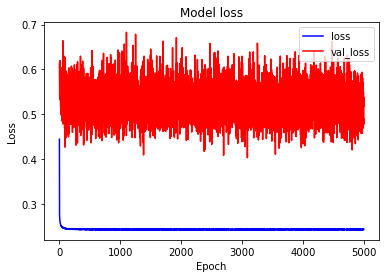

In [8]:
# 모델 손실 함수 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

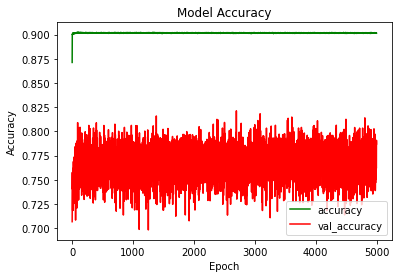

In [9]:
# 모델 정확도 시각화
plt.plot(history.history['binary_accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_binary_accuracy'], 'r-', label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Full x_data test
test_data = np.loadtxt('MIMO_2_0dB_test.csv', delimiter=',', dtype=np.float32)
x_test_data = test_data[:, 1:13]
y_test_data = test_data[:, -4:]
print(x_test_data.shape, y_test_data.shape)

(80000, 12) (80000, 4)


In [11]:
# Convert y_test_data to y_test_bit
i=1
y_test_merge = []
while i <= y_test_data.shape[0]:
    temp2 = "".join(str(_) for _ in y_test_data[i-1,:])
    y_test_merge.append(temp2)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_test_merge)
y_test_bit = encoder.transform(y_test_merge)
y_test_bit = y_test_bit.reshape(-1, 1)
print(y_test_bit)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]


In [12]:
# Convert y_data to one_hot
y_test_one_hot = tf.keras.utils.to_categorical(y_test_bit, nb_classes)
print("one_hot:", y_test_one_hot)

one_hot: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [13]:
predict_x = tf.model.predict(x_test_data) 
pred = np.argmax(predict_x,axis=1)
for p, y in zip(pred, y_test_bit.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[

[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[T

[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True

[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[

[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[T

[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[False] Prediction: 0 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[T

[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 3 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[Tr

[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 3 True Y: 0
[False] Prediction: 3 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[Tru

[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 3 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 3 True Y: 0
[True] Prediction: 0 True Y: 0
[Tru

[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 2 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 3 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[T

[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 2 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True]

[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] 

[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 2 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 2 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 0 True Y: 3
[False] Prediction: 0 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 0 True Y:

[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 0 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 0 True Y: 3
[False] Prediction: 0 True Y: 3
[T

[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 0 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 2 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[Tr

[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 0 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True]

[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 2
[False] Prediction: 0 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True 

[False] Prediction: 3 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 0 Tru

[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 1 True Y: 2
[False] Prediction: 1 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[False] Prediction: 1 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 T

[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[False] Prediction: 0 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 Tr

[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2

[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 0 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[False] Prediction: 3 True Y: 2


In [14]:
evaluation = tf.model.evaluate(x_test_data, y_test_one_hot)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

2500/2500 [==============================] - 6s 2ms/step - loss: 0.2805 - binary_accuracy: 0.8827
loss:  0.280451238155365
accuracy 0.8826718926429749


In [36]:
error_cnt = 0
for p, y in zip(pred, y_test_bit.flatten()):
    if p == 1 and int(y) == 0:
        error_cnt = error_cnt + 1
    elif p == 0 and int(y) == 1:
        error_cnt = error_cnt + 1
        
    elif p == 1 and int(y) == 3:
        error_cnt = error_cnt + 1
    elif p == 3 and int(y) == 1:
        error_cnt = error_cnt + 1
        
    elif p == 0 and int(y) == 2:
        error_cnt = error_cnt + 1
    elif p == 2 and int(y) == 0:
        error_cnt = error_cnt + 1
        
    elif p == 1 and int(y) == 2:
        error_cnt = error_cnt + 2
    elif p == 2 and int(y) == 1:
        error_cnt = error_cnt + 2
    
    elif p == 0 and int(y) == 3:
        error_cnt = error_cnt + 2
    elif p == 3 and int(y) == 0:
        error_cnt = error_cnt + 2

p: 3 y: 1 Error Count: 1
p: 0 y: 1 Error Count: 2
p: 0 y: 1 Error Count: 3
p: 0 y: 1 Error Count: 4
p: 0 y: 1 Error Count: 5
p: 3 y: 1 Error Count: 6
p: 3 y: 1 Error Count: 7
p: 0 y: 1 Error Count: 8
p: 3 y: 1 Error Count: 9
p: 0 y: 1 Error Count: 10
p: 0 y: 1 Error Count: 11
p: 0 y: 1 Error Count: 12
p: 3 y: 1 Error Count: 13
p: 0 y: 1 Error Count: 14
p: 3 y: 1 Error Count: 15
p: 3 y: 1 Error Count: 16
p: 3 y: 1 Error Count: 17
p: 3 y: 1 Error Count: 18
p: 3 y: 1 Error Count: 19
p: 3 y: 1 Error Count: 20
p: 0 y: 1 Error Count: 21
p: 3 y: 1 Error Count: 22
p: 0 y: 1 Error Count: 23
p: 3 y: 1 Error Count: 24
p: 3 y: 1 Error Count: 25
p: 3 y: 1 Error Count: 26
p: 0 y: 1 Error Count: 27
p: 3 y: 1 Error Count: 28
p: 0 y: 1 Error Count: 29
p: 3 y: 1 Error Count: 30
p: 3 y: 1 Error Count: 31
p: 0 y: 1 Error Count: 32
p: 0 y: 1 Error Count: 33
p: 3 y: 1 Error Count: 34
p: 3 y: 1 Error Count: 35
p: 3 y: 1 Error Count: 36
p: 3 y: 1 Error Count: 37
p: 3 y: 1 Error Count: 38
p: 3 y: 1 Error Count

p: 3 y: 1 Error Count: 2958
p: 3 y: 1 Error Count: 2959
p: 3 y: 1 Error Count: 2960
p: 3 y: 1 Error Count: 2961
p: 3 y: 1 Error Count: 2962
p: 0 y: 1 Error Count: 2963
p: 0 y: 1 Error Count: 2964
p: 3 y: 1 Error Count: 2965
p: 3 y: 1 Error Count: 2966
p: 3 y: 1 Error Count: 2967
p: 0 y: 1 Error Count: 2968
p: 0 y: 1 Error Count: 2969
p: 3 y: 1 Error Count: 2970
p: 3 y: 1 Error Count: 2971
p: 3 y: 1 Error Count: 2972
p: 0 y: 1 Error Count: 2973
p: 3 y: 1 Error Count: 2974
p: 3 y: 1 Error Count: 2975
p: 3 y: 1 Error Count: 2976
p: 3 y: 1 Error Count: 2977
p: 3 y: 1 Error Count: 2978
p: 0 y: 1 Error Count: 2979
p: 0 y: 1 Error Count: 2980
p: 0 y: 1 Error Count: 2981
p: 3 y: 1 Error Count: 2982
p: 0 y: 1 Error Count: 2983
p: 3 y: 1 Error Count: 2984
p: 3 y: 1 Error Count: 2985
p: 0 y: 1 Error Count: 2986
p: 3 y: 1 Error Count: 2987
p: 0 y: 1 Error Count: 2988
p: 3 y: 1 Error Count: 2989
p: 3 y: 1 Error Count: 2990
p: 3 y: 1 Error Count: 2991
p: 3 y: 1 Error Count: 2992
p: 0 y: 1 Error Coun

p: 1 y: 0 Error Count: 6225
p: 1 y: 0 Error Count: 6226
p: 3 y: 0 Error Count: 6228
p: 1 y: 0 Error Count: 6229
p: 1 y: 0 Error Count: 6230
p: 2 y: 0 Error Count: 6231
p: 3 y: 0 Error Count: 6233
p: 3 y: 0 Error Count: 6235
p: 1 y: 0 Error Count: 6236
p: 3 y: 0 Error Count: 6238
p: 1 y: 0 Error Count: 6239
p: 3 y: 0 Error Count: 6241
p: 1 y: 0 Error Count: 6242
p: 1 y: 0 Error Count: 6243
p: 2 y: 0 Error Count: 6244
p: 3 y: 0 Error Count: 6246
p: 1 y: 0 Error Count: 6247
p: 3 y: 0 Error Count: 6249
p: 1 y: 0 Error Count: 6250
p: 2 y: 0 Error Count: 6251
p: 3 y: 0 Error Count: 6253
p: 1 y: 0 Error Count: 6254
p: 1 y: 0 Error Count: 6255
p: 1 y: 0 Error Count: 6256
p: 1 y: 0 Error Count: 6257
p: 1 y: 0 Error Count: 6258
p: 3 y: 0 Error Count: 6260
p: 1 y: 0 Error Count: 6261
p: 1 y: 0 Error Count: 6262
p: 2 y: 0 Error Count: 6263
p: 1 y: 0 Error Count: 6264
p: 1 y: 0 Error Count: 6265
p: 1 y: 0 Error Count: 6266
p: 1 y: 0 Error Count: 6267
p: 1 y: 0 Error Count: 6268
p: 3 y: 0 Error Coun

p: 1 y: 3 Error Count: 9553
p: 1 y: 3 Error Count: 9554
p: 1 y: 3 Error Count: 9555
p: 1 y: 3 Error Count: 9556
p: 0 y: 3 Error Count: 9558
p: 1 y: 3 Error Count: 9559
p: 1 y: 3 Error Count: 9560
p: 1 y: 3 Error Count: 9561
p: 1 y: 3 Error Count: 9562
p: 0 y: 3 Error Count: 9564
p: 1 y: 3 Error Count: 9565
p: 1 y: 3 Error Count: 9566
p: 1 y: 3 Error Count: 9567
p: 1 y: 3 Error Count: 9568
p: 1 y: 3 Error Count: 9569
p: 0 y: 3 Error Count: 9571
p: 1 y: 3 Error Count: 9572
p: 1 y: 3 Error Count: 9573
p: 1 y: 3 Error Count: 9574
p: 1 y: 3 Error Count: 9575
p: 1 y: 3 Error Count: 9576
p: 0 y: 3 Error Count: 9578
p: 1 y: 3 Error Count: 9579
p: 1 y: 3 Error Count: 9580
p: 1 y: 3 Error Count: 9581
p: 1 y: 3 Error Count: 9582
p: 1 y: 3 Error Count: 9583
p: 0 y: 3 Error Count: 9585
p: 1 y: 3 Error Count: 9586
p: 1 y: 3 Error Count: 9587
p: 1 y: 3 Error Count: 9588
p: 0 y: 3 Error Count: 9590
p: 1 y: 3 Error Count: 9591
p: 0 y: 3 Error Count: 9593
p: 1 y: 3 Error Count: 9594
p: 0 y: 3 Error Coun

p: 0 y: 2 Error Count: 13178
p: 0 y: 2 Error Count: 13179
p: 0 y: 2 Error Count: 13180
p: 0 y: 2 Error Count: 13181
p: 0 y: 2 Error Count: 13182
p: 0 y: 2 Error Count: 13183
p: 0 y: 2 Error Count: 13184
p: 0 y: 2 Error Count: 13185
p: 0 y: 2 Error Count: 13186
p: 0 y: 2 Error Count: 13187
p: 1 y: 2 Error Count: 13189
p: 0 y: 2 Error Count: 13190
p: 0 y: 2 Error Count: 13191
p: 0 y: 2 Error Count: 13192
p: 0 y: 2 Error Count: 13193
p: 0 y: 2 Error Count: 13194
p: 0 y: 2 Error Count: 13195
p: 0 y: 2 Error Count: 13196
p: 0 y: 2 Error Count: 13197
p: 0 y: 2 Error Count: 13198
p: 0 y: 2 Error Count: 13199
p: 0 y: 2 Error Count: 13200
p: 0 y: 2 Error Count: 13201
p: 0 y: 2 Error Count: 13202
p: 0 y: 2 Error Count: 13203
p: 0 y: 2 Error Count: 13204
p: 0 y: 2 Error Count: 13205
p: 0 y: 2 Error Count: 13206
p: 0 y: 2 Error Count: 13207
p: 1 y: 2 Error Count: 13209
p: 0 y: 2 Error Count: 13210
p: 0 y: 2 Error Count: 13211
p: 0 y: 2 Error Count: 13212
p: 0 y: 2 Error Count: 13213
p: 0 y: 2 Erro

In [44]:
BER = (error_cnt)/(y_test_data.shape[0]*2)
print("BER: {}".format(BER))

BER: 0.10275
